# Index

- [K-Mean Algorithm](#k-means-algorithm)
    - [The K-Mean Algorithm](#the-k-mean-algorithm)
    - [Using K-Mean from Scratch](#using-k-mean-from-scratch)
    - [How to calculate the optimal number of Clusters](#how-to-calculate-the-optimal-number-of-clusters)
        - [Silhouette Coefficient](#silhouette-coefficient)

- [DBSCAN Algorithm](#dbscan-algorithm)
    - [The DBSCAN Algorithm](#the-dbscan-algorithm)
    - [Problem with DBSCAN](#problem-with-dbscan)
    - [Tuning the eps parameter](#tuning-the-eps-parameter)
- [Hierarchical Clustering](#hierarchical-clustering)
    - [Hierarchical Agglomerative Algorithm](#hierarchical-agglomerative-algorithm)
        - [Most used types of linkage](#most-used-types-of-linkage)
    - [Hierarchical Divisive Algorithm](#hierarchical-divisive-algorithm)

---

## K-Means Algorithm

Unsupervised learning algorithms, also called **clustering algorithms**, learn from the properties of the data to find an optimal division of the samples into groups, assigning each sample to a discrete cluster label.

Many clustering algorithms are available in the Scikit-Learn library, but the simplest one is known as K-Means, which is implemented as sklearn.cluster.KMeans.

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set_theme()
import numpy as np
import warnings

The algorithm searches for the optimal number of clusters in a unlabeled multidimensional dataset.
- The center of a cluster is the arithmetic mean of all the points belonging to that cluster.
- Each point is closer to its own cluster center than to the centers of other clusters.

### **The K-Mean Algorithm**

1. Randomly select k centroids $C = \{C_1, C_2, ..., C_k\}$ from the data points $X = \{x_1, x_2, ..., x_n\} \in \mathbb{R}^D$ 
2. For each $x_i$ calculate the squared distance of that point for each centroids
3. The point is assigned to the cluster which has the smallest squared distance
4. Update the centroid positions based on the newly assigned points and repeat steps 2 and 3 until the change between the old and new centroids is below some threshold.

In [2]:
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

Let's create a bidimensional Dataset that has 3 clusters. All the points are going to have the same color (Unlabeled) 

In [ ]:
x, y = make_blobs(n_samples=2000, n_features=2, centers=3, random_state=170)
print(x)
print(y)

[[ -3.2098572    0.17028461]
 [-10.75792688  -6.03580724]
 [  1.82599087  -0.03013326]
 ...
 [  2.4903263    0.93888766]
 [  3.72973118   0.55967836]
 [ -4.51766507   0.73505799]]
[1 0 2 ... 2 2 1]


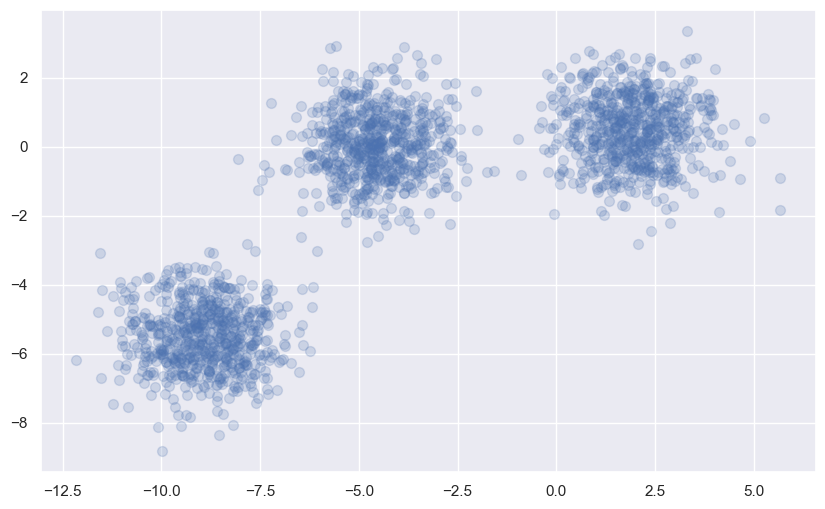

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1], s=50, alpha=0.2)
plt.show()

In [8]:
kmean = KMeans(n_clusters=3, n_init=3, init='k-means++', tol=1e-4, random_state=170, verbose=True)
kmean.fit(x)

Initialization complete
Iteration 0, inertia 6881.09907521286.
Iteration 1, inertia 3863.4811629091455.
Converged at iteration 1: center shift 0.0004958290344457466 within tolerance 0.001460220601920181.
Initialization complete
Iteration 0, inertia 6828.954670351951.
Iteration 1, inertia 3863.669599097694.
Converged at iteration 1: center shift 0.0007788466251475721 within tolerance 0.001460220601920181.
Initialization complete
Iteration 0, inertia 5307.66822379849.
Iteration 1, inertia 3863.185267723683.
Converged at iteration 1: center shift 5.199991875389339e-05 within tolerance 0.001460220601920181.


,n_clusters,3
,init,'k-means++'
,n_init,3
,max_iter,300
,tol,0.0001
,verbose,True
,random_state,170
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Predictions and Cluster's centroids

print(kmean.labels_)
print(kmean.cluster_centers_)

[2 1 0 ... 0 0 2]
[[ 1.91436542  0.47449673]
 [-8.93184647 -5.51241747]
 [-4.57551529  0.03080554]]


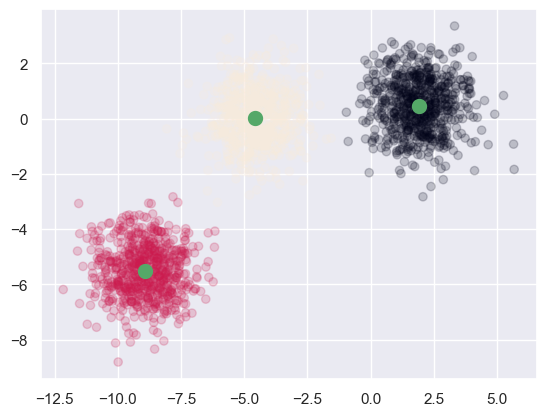

In [10]:
# Let's Graph

plt.Figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=kmean.labels_, alpha=0.2)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='g', marker='o', linewidths=5)
plt.show()

With the trained model we can predict new points

In [ ]:
x_new = np.array([[10,10], [-10, -10], [-5, 10]])
y_pred = kmean.predict(x_new)
print(y_pred) # Print the clusters where belongs

[0 1 2]


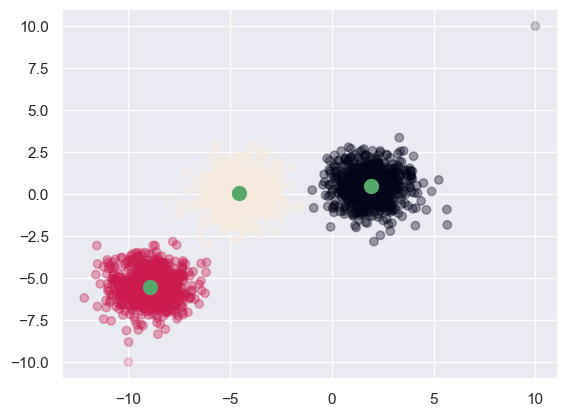

In [13]:
# Let's graph the new points
plt.scatter(x[:, 0], x[:, 1], c=kmean.labels_, alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred, alpha=0.2)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='g', marker='o', linewidths=5)
plt.show()

In [14]:
# Getting the distance to each centroid from a point

kmean.transform(x_new)

array([[12.49450675, 24.47549605, 17.6587226 ],
       [15.86402173,  4.61295446, 11.40360006],
       [11.77045716, 16.00295325,  9.97822757]])

## Using K-Mean from scratch

The task involves grouping players from the Spanish Football League based on their playing characteristics using the K-means clustering algorithm. The clusters are expected to roughly correspond to player roles: goalkeeper, defender, midfielder (central), and forward. Although this role information serves as reference, the approach is unsupervised learning.

The goal is to verify whether the clusters generated by the algorithm are consistent with football dynamics and the players’ actual roles. The dataset, provided in the file laLiga.csv, will be used for model development. To improve system performance and facilitate data visualization, only players with more than 2000 minutes of playtime will be considered.

Steps:
1. Perform an initial Data Analysis
2. Handle missing data (If needed)
3. Remove the data labels from the training vector
4. Select variables for the model (using a Correlation Matrix is recomended)
5. Normalize the Data
6. Apply PCA to reduce data dimensionality and visualize the model in a 2D plot
7. Implement the K-Mean model
8. Plot the result

In [11]:
import pandas as pd
import numpy as np
import statistics as stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs

In [2]:
laliga_data = pd.read_csv('LaLiga.csv')
laliga_data.head(10)

,Jugador,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
0,Eden Hazard,3,11,803,1,2,0,0,13,9,...,0,39,15,86,1,0,0,0,0,0
1,Adnan Januzaj,3,17,804,2,3,0,0,19,5,...,0,20,17,68,11,3,0,2,0,0
2,Pione Sisto,3,20,804,2,0,0,0,27,14,...,1,24,9,83,12,6,1,1,0,0
3,Alfonso Pedraza,2,13,808,0,0,0,0,9,300,...,0,13,700,75,0,0,0,0,0,0
4,Jeison Murillo,2,9,810,0,0,0,0,2,100,...,0,1,0,83,0,2,0,0,0,0
5,Sidnei,2,10,815,1,0,0,0,3,200,...,0,4,0,89,0,8,0,0,0,0
6,Erick Cabaco,2,12,816,0,0,0,0,4,0,...,0,4,200,75,0,7,0,0,0,0
7,Junior Firpo,2,13,819,1,0,0,0,4,100,...,1,7,800,89,0,1,0,0,0,0
8,Thomas Lemar,3,18,838,0,0,0,0,8,2,...,0,19,6,83,13,7,1,2,1,0
9,Samuel Umtiti,2,11,841,0,0,0,0,0,0,...,0,8,0,93,0,6,0,0,0,0


In [ ]:
# Step 1: Perform an initial data analysis

laliga_data.describe()

,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2.652174,21.371237,1625.725753,2.103679,1.454849,4.709030,2.197324,18.518395,93.468227,29.685619,...,0.167224,15.056856,361.816054,75.969900,5.645485,7.779264,0.605351,0.846154,0.230769,0.063545
std,0.862776,4.755002,496.247866,2.944558,1.841123,17.493785,8.035441,17.240954,166.744353,19.801231,...,0.454798,15.019901,733.321402,10.087658,14.298639,10.818117,1.658243,2.369353,0.903158,0.356119
min,1.000000,9.000000,803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.000000,1208.500000,0.000000,0.000000,0.000000,0.000000,6.000000,3.500000,17.000000,...,0.000000,4.000000,10.000000,70.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,22.000000,1620.000000,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,30.000000,...,0.000000,11.000000,22.000000,77.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,25.500000,2042.000000,3.000000,2.000000,0.000000,0.000000,28.000000,100.000000,40.000000,...,0.000000,19.000000,300.000000,83.000000,1.000000,10.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,28.000000,2520.000000,20.000000,14.000000,128.000000,46.000000,108.000000,1200.000000,100.000000,...,3.000000,126.000000,4600.000000,93.000000,87.000000,60.000000,12.000000,23.000000,10.000000,4.000000


In [11]:
laliga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Jugador                          299 non-null    object
 1   categoria                        299 non-null    int64 
 2   Partidos                         299 non-null    int64 
 3   Minutos_jugados                  299 non-null    int64 
 4   Goles                            299 non-null    int64 
 5   Asistencias                      299 non-null    int64 
 6   Paradas                          299 non-null    int64 
 7   Goles_encajados                  299 non-null    int64 
 8   Tiros                            299 non-null    int64 
 9   Tiros_a_ puerta                  299 non-null    int64 
 10  Precision_tiros                  299 non-null    int64 
 11  Centros                          299 non-null    int64 
 12  Centros_ precisos                299

In [ ]:
# Step 2: Handle the missing data (if needed)
print(laliga_data.isnull().sum())


Jugador                            0
categoria                          0
Partidos                           0
Minutos_jugados                    0
Goles                              0
Asistencias                        0
Paradas                            0
Goles_encajados                    0
Tiros                              0
Tiros_a_ puerta                    0
Precision_tiros                    0
Centros                            0
Centros_ precisos                  0
Precision_centros                  0
Tiros_al palo                      0
Corners_forzados                   0
Faltas_recibidas                   0
Faltas_cometidas                   0
Pases_interceptados                0
Balones_robados                    0
Balones_robado al_ultimo_hombre    0
Tarjetas_amarillas                 0
Tarjetas_rojas                     0
Penaltis_cometidos                 0
Penaltis_forzados                  0
Penaltis_lanzados                  0
Penaltis_anotados                  0
P

In [3]:
# Step 3: Remove the data labels from the training vector

train_data = laliga_data.drop(['Jugador', 'categoria'], axis=1) # Removed the names and the category column, because is not needed
train_data = train_data[train_data['Minutos_jugados'] > 2000] # Removed the players who didn't play more than 2000 minutes
train_data

,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,Centros,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
215,24,2004,0,1,0,0,11,0,0,5,...,0,13,4,88,0,0,0,0,0,0
216,23,2013,1,4,0,0,15,400,27,125,...,0,19,2500,65,45,44,1,5,2,0
217,23,2015,4,5,0,0,42,14,33,93,...,0,57,54,85,48,41,7,3,1,1
218,28,2016,2,2,0,0,32,12,38,58,...,0,29,28,69,0,0,0,0,0,0
219,25,2021,0,3,0,0,10,300,30,60,...,1,12,2100,77,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,28,2518,0,4,0,0,9,200,22,179,...,0,30,4600,80,0,1,0,0,0,0
295,28,2520,0,0,128,41,0,0,0,0,...,1,0,1,59,0,4,0,0,0,0
296,28,2520,0,0,58,27,0,0,0,0,...,2,0,0,41,0,31,0,0,0,0
297,28,2520,0,0,72,34,0,0,0,0,...,3,0,1,47,0,11,0,0,0,0


<Axes: >

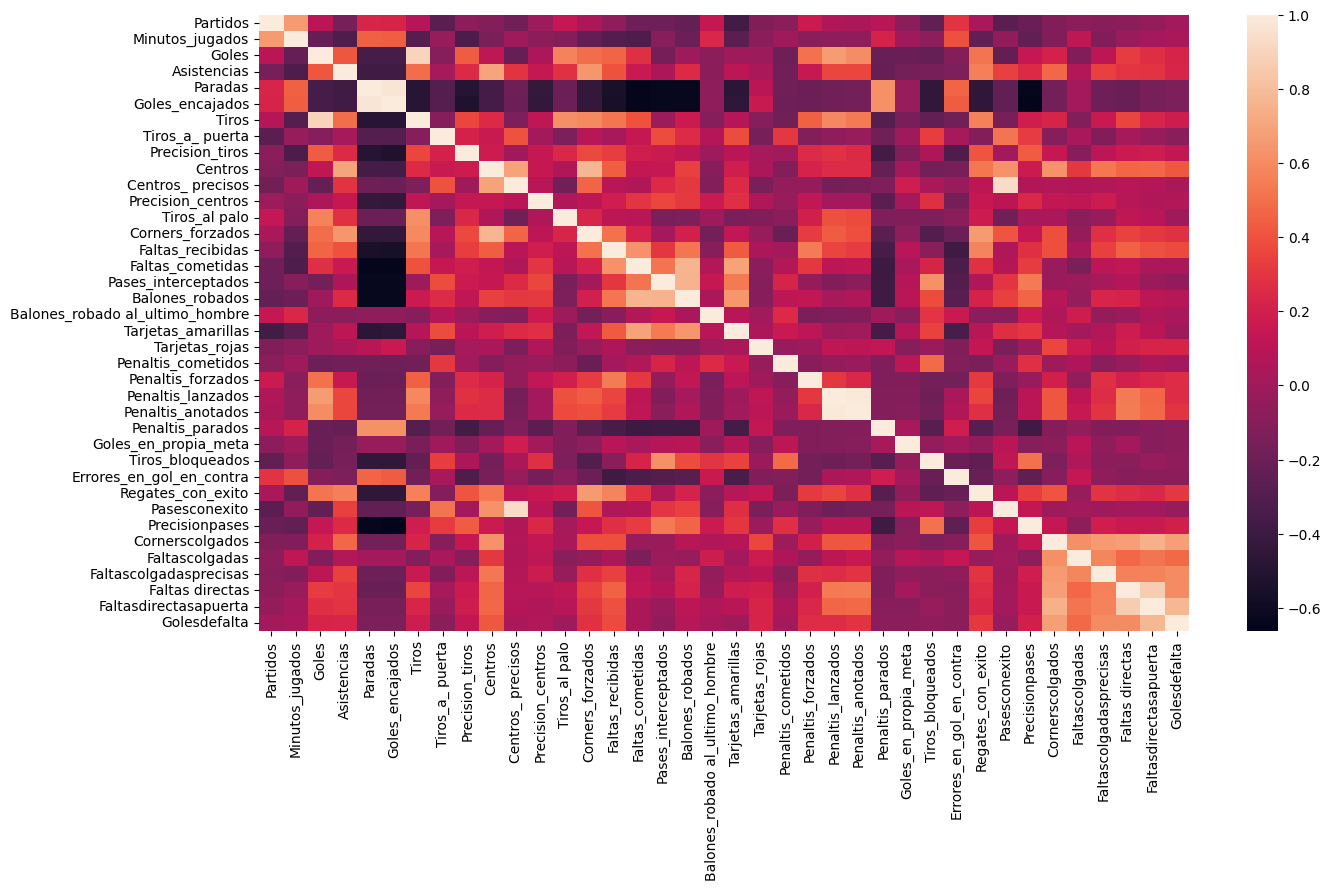

In [21]:
# Step 4: Select variables for the model (using a Correlation Matrix is recomended)

corr = train_data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr)

In [22]:
# Reducing the columns to:  Goles, Tiros, Precision_tiros, Faltas_recibidas, Faltas_cometidas, Tiros_al palo, Corners_forzados, Penaltis_forzados, Penaltis_lanzados, Penaltis_parados, Regates_con_exito, Faltas directas
train_data_reduced = train_data[['Goles', 'Tiros', 'Precision_tiros', 'Faltas_recibidas', 'Faltas_cometidas', 'Tiros_al palo', 'Corners_forzados', 'Penaltis_forzados', 'Penaltis_lanzados', 'Penaltis_parados', 'Regates_con_exito', 'Faltas directas']]
train_data_reduced

,Goles,Tiros,Precision_tiros,Faltas_recibidas,Faltas_cometidas,Tiros_al palo,Corners_forzados,Penaltis_forzados,Penaltis_lanzados,Penaltis_parados,Regates_con_exito,Faltas directas
215,0,11,0,18,41,0,2,0,0,0,13,0
216,1,15,27,39,42,0,12,0,0,0,19,5
217,4,42,33,29,22,0,17,0,0,0,57,3
218,2,32,38,12,9,1,32,0,0,0,29,0
219,0,10,30,20,14,0,15,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,9,22,21,14,0,31,0,0,0,30,0
295,0,0,0,4,0,0,1,0,0,2,0,0
296,0,0,0,0,1,0,1,0,0,1,0,0
297,0,0,0,1,0,0,1,0,0,0,0,0


In [31]:
# Step 5: Normalize the data

scaler = MinMaxScaler()
normalized_train_data = scaler.fit_transform(train_data_reduced)
normalized_train_data_df = pd.DataFrame(normalized_train_data, columns=train_data_reduced.columns)
normalized_train_data_df

,Goles,Tiros,Precision_tiros,Faltas_recibidas,Faltas_cometidas,Tiros_al palo,Corners_forzados,Penaltis_forzados,Penaltis_lanzados,Penaltis_parados,Regates_con_exito,Faltas directas
0,0.000000,0.114583,0.00,0.236842,0.594203,0.0,0.06250,0.0,0.0,0.000000,0.216667,0.000000
1,0.071429,0.156250,0.27,0.513158,0.608696,0.0,0.37500,0.0,0.0,0.000000,0.316667,0.333333
2,0.285714,0.437500,0.33,0.381579,0.318841,0.0,0.53125,0.0,0.0,0.000000,0.950000,0.200000
3,0.142857,0.333333,0.38,0.157895,0.130435,0.2,1.00000,0.0,0.0,0.000000,0.483333,0.000000
4,0.000000,0.104167,0.30,0.263158,0.202899,0.0,0.46875,0.0,0.0,0.000000,0.200000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.000000,0.093750,0.22,0.276316,0.202899,0.0,0.96875,0.0,0.0,0.000000,0.500000,0.000000
80,0.000000,0.000000,0.00,0.052632,0.000000,0.0,0.03125,0.0,0.0,0.666667,0.000000,0.000000
81,0.000000,0.000000,0.00,0.000000,0.014493,0.0,0.03125,0.0,0.0,0.333333,0.000000,0.000000
82,0.000000,0.000000,0.00,0.013158,0.000000,0.0,0.03125,0.0,0.0,0.000000,0.000000,0.000000


In [30]:
# Step 6: Apply PCA to reduce dimensionality

pca = PCA(n_components = 2) # 2D plot
reduced_data = pca.fit_transform(normalized_train_data)
reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df

,0,1
0,-0.284034,0.264871
1,0.118630,0.311177
2,0.478206,0.030905
3,0.284752,-0.235285
4,-0.157709,-0.008613
...,...,...
79,0.139491,-0.012964
80,-0.702790,-0.301916
81,-0.678498,-0.255181
82,-0.638655,-0.201386


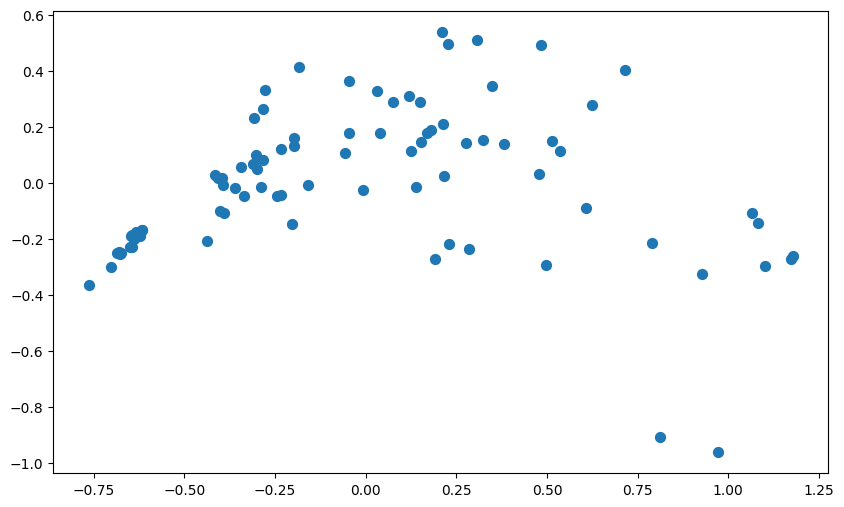

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50)
plt.show()

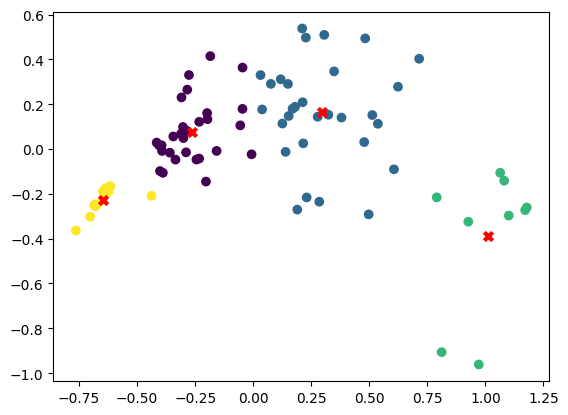

In [35]:
# Step 7: Implementing K-Mean model

kmean = KMeans(n_clusters=4,
               n_init=3,
               init='k-means++',
               tol=1e-4,
               random_state=170,
               verbose=False,).fit(reduced_data)
plt.Figure(figsize=(16,8))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=kmean.labels_, cmap='viridis')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='r', marker='x', linewidths=3)
plt.show()

In [43]:
y_train = laliga_data[laliga_data['Minutos_jugados'] > 2000]['categoria'].to_numpy()
score = metrics.accuracy_score(y_train, kmean.labels_ + 1)
score

0.19047619047619047

The score of **0.19 (19%)** indicates that the clusters generated by the K-means model **do not correctly separate the real categories**. In fact, this value is so low that it would be **comparable to a random selection**.

This suggests that either the **features used to train the model** are not optimal, or the **configuration of the algorithm** needs improvement. The possibles causes could be:


1. **Incorrect number of clusters**: Choosing an inappropriate value for *k* may lead to poorly defined clusters.

2. **Poor initialization of centroids**: K-means is sensitive to the initial starting points of the centroids, which can lead to local minima.

3. **Lack of feature scaling**: When features are on different scales, the distance calculations may be biased.

4. **Irrelevant or noisy features**: Using columns that do not provide meaningful separation between categories can degrade clustering performance.

5. **Non-spherical data distribution**: K-means assumes clusters are spherical and of similar size; it struggles with complex shapes.

6. **Presence of outliers**: Outliers can significantly affect the position of the centroids and distort the clusters.


Comparing with the real data and labeling the points:

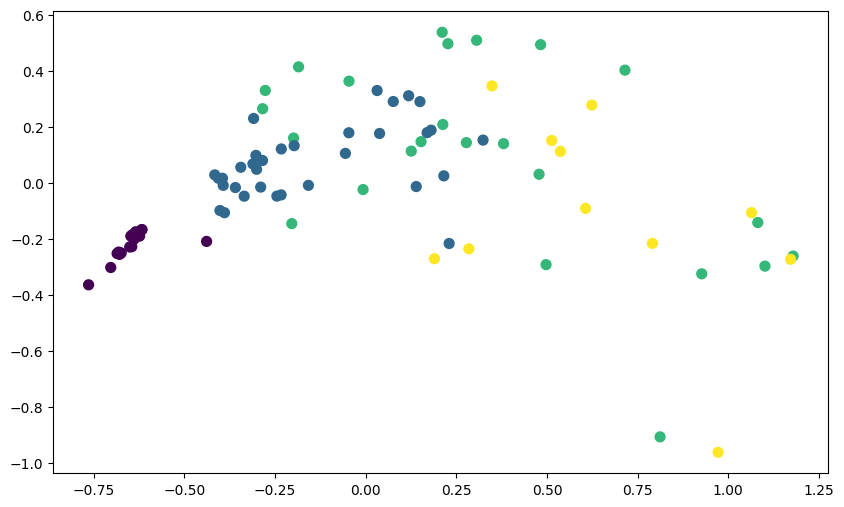

In [44]:
# Real Data
plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50, c=y_train)
plt.show()

## How to calculate the optimal number of Clusters

To get the optimal number of clusters, is used the **Elbow Method**. It's an iterative calculus of the **Within-Cluster Sum of Squares (WCSS)** or also known as **Inertia** in Scikit-Learn. It's the sum of each point and the centroid asociated to that point. 

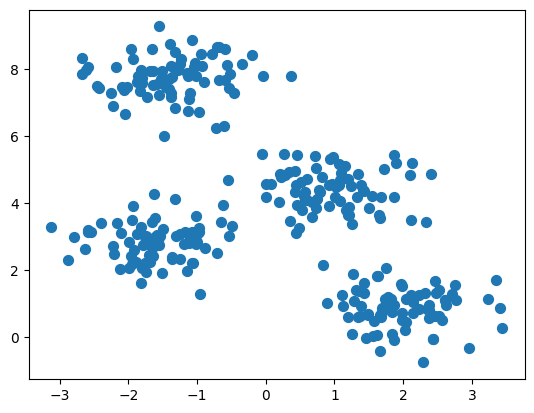

In [7]:
# Using new data
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

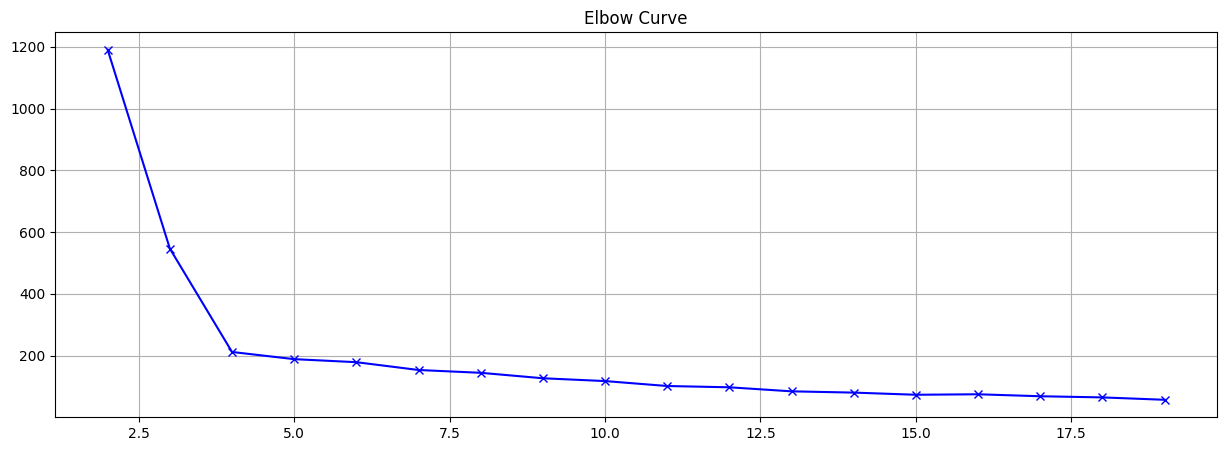

In [5]:
distortion = []
for k in range(2,20):
    k_mean = KMeans(n_clusters=k, n_init='auto')
    k_mean.fit(X)
    distortion.append(k_mean.inertia_)
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20), distortion, 'bx-')
plt.grid(True)
plt.title('Elbow Curve')
plt.show()

With the plot, the difference between the WCSS from 3 clusters and the WCSS from 4 clusters is considerable, so, **probably** 4 clusters is the best option to create the model.

We need more tools to measure the **quality of the clusters** to determine if which number of clusters is the best option. For Supervised Models, usually is calculated:

- Homogeneity: Each cluster has members of the same class (label)
- Completeness: Every member of a determined class are assign to the same group.

For the Unsupervised Models, we can calculate the Silhouette Coefficient (The most important) 

#### **Silhouette Coefficient**

It measures the compactness and the separation between clusters. Using the Silhouette Coefficient, can find the optimal number of clusters.

* **Step 1**: $a(x_i)$ denotates the **inter-cluster mean distance**. Evaluate how compact is the cluster where belongs. More lower, then more compact.

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$

For the point $x_i$, calculate the mean distance of each point of the cluster.

* **Step 2**: $b(x_i)$ defines the **mean distance to the closer cluster**. Evaluates how far is $x_i$ from others clusters. The bigger, more far is.

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

For the $x_i$ point and all the others clusters that doesn't contains $x_i$, calculate the mean distance for all other points in the others clusters. Find the value of the minimum distance regarding other clusters.

* **Step 3**: Finally, the *Silhouette Coefficient* is:
 $$ s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $$
where $a(x_i) \lt b(x_i)$ and $a(x_i) \to 0$ for $s(x_i) \to 1$.

Calculating the Silhouette Coefficient for 2, 3, 4, 5 and 6 clusters.

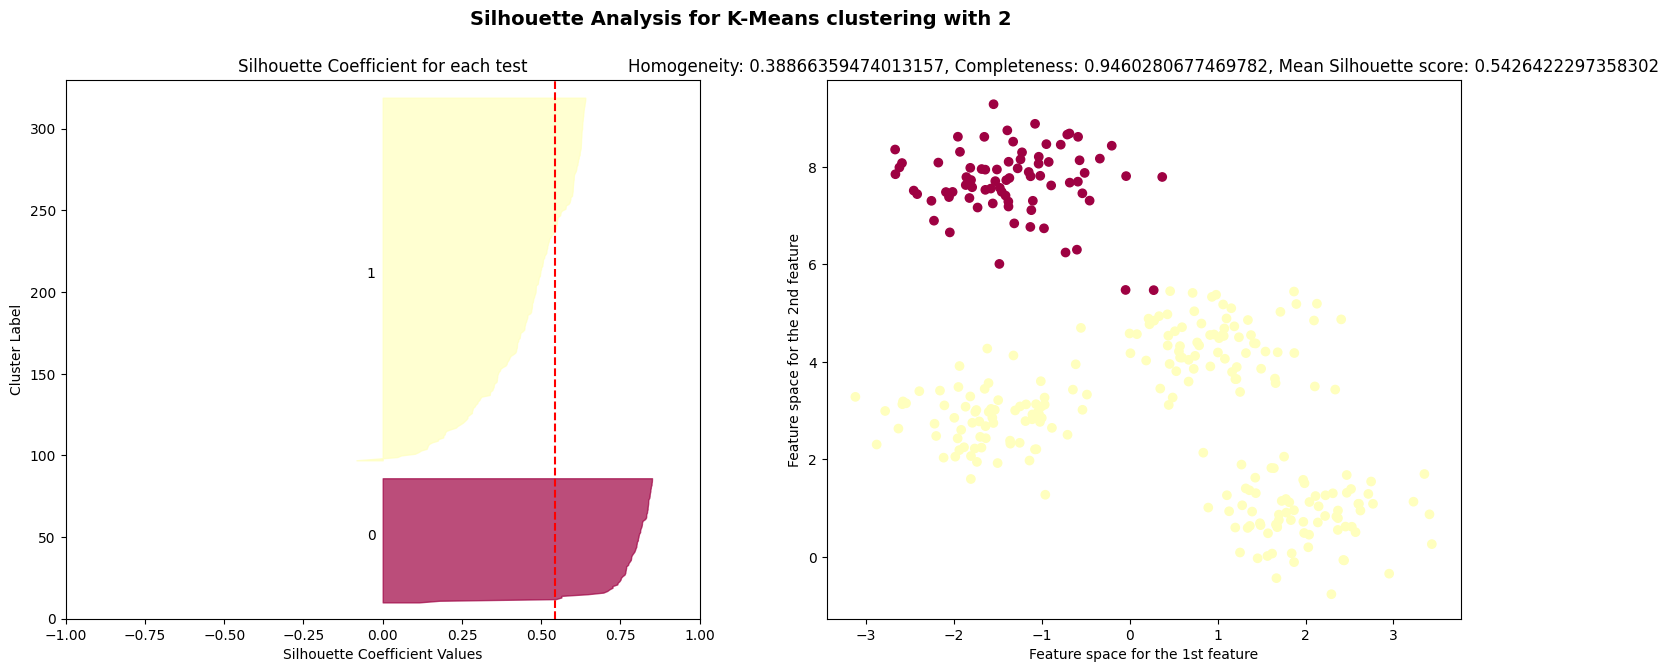

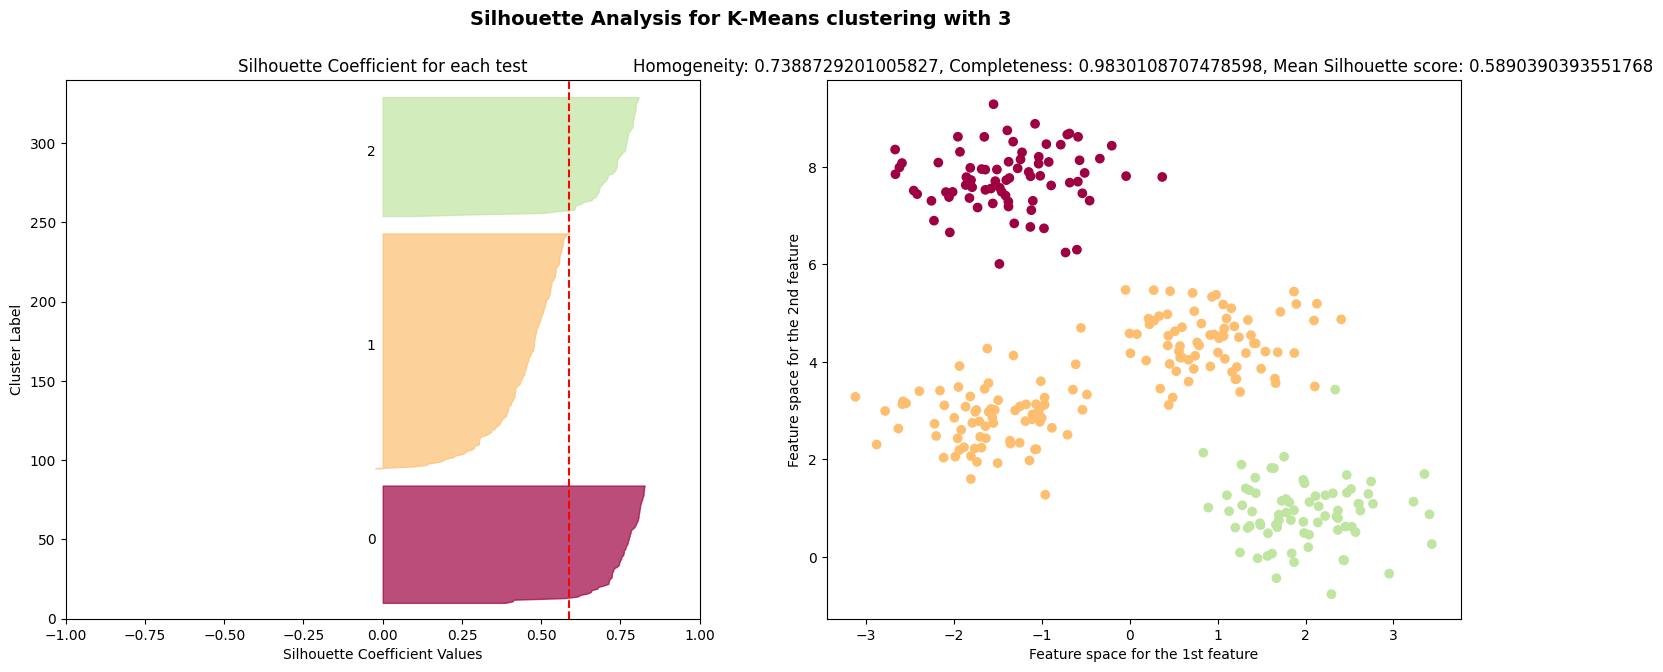

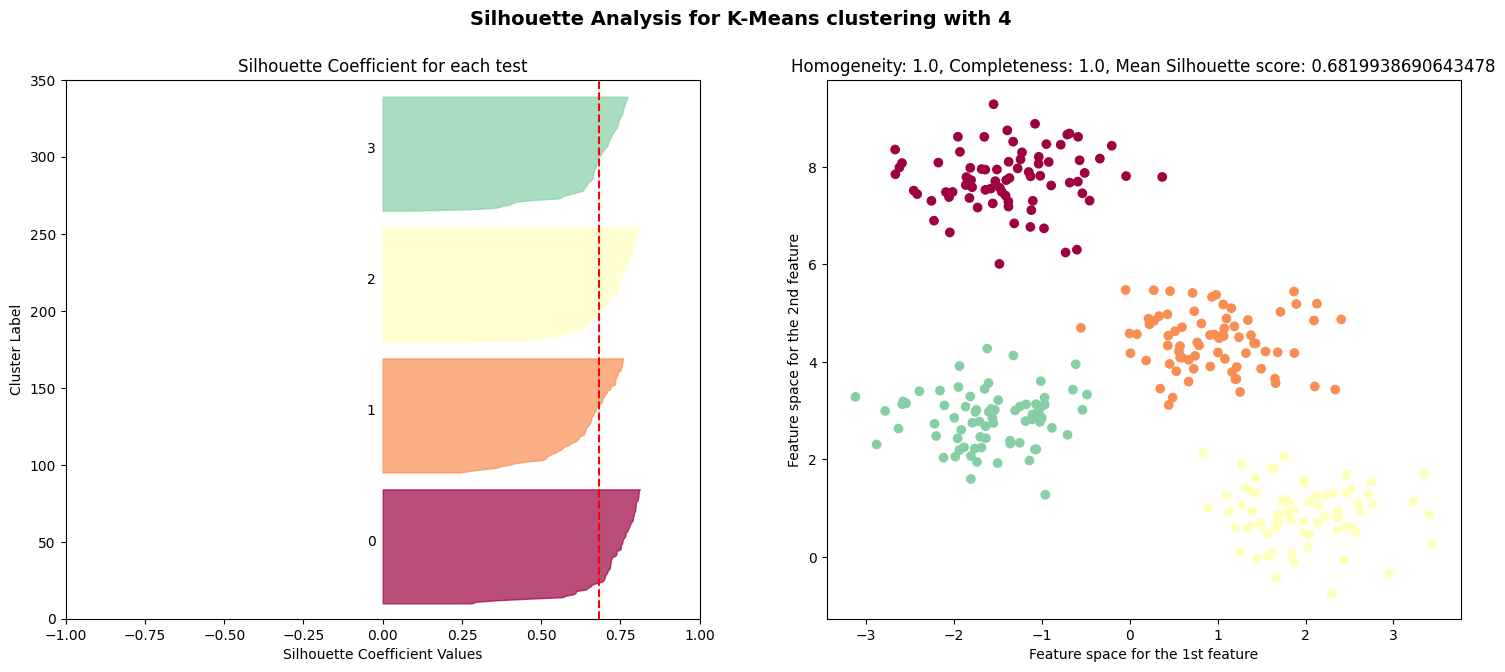

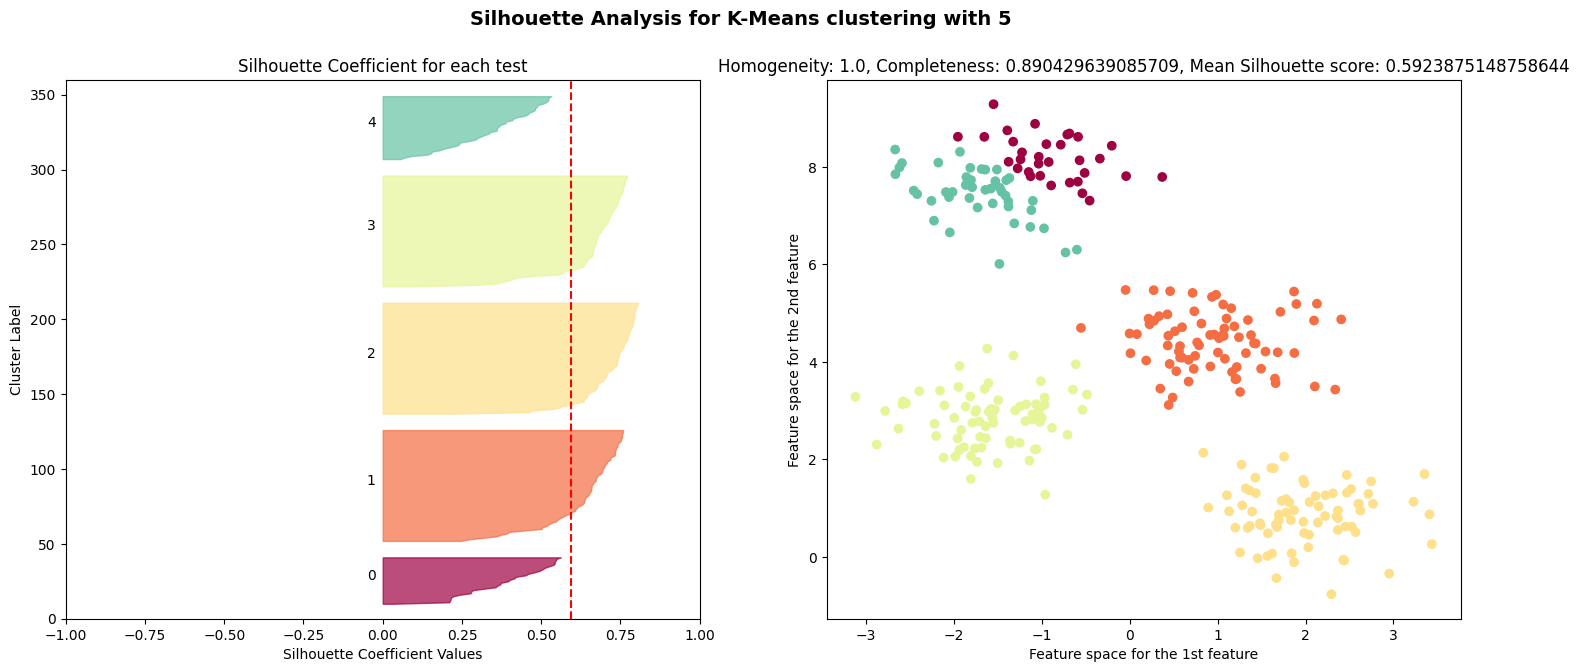

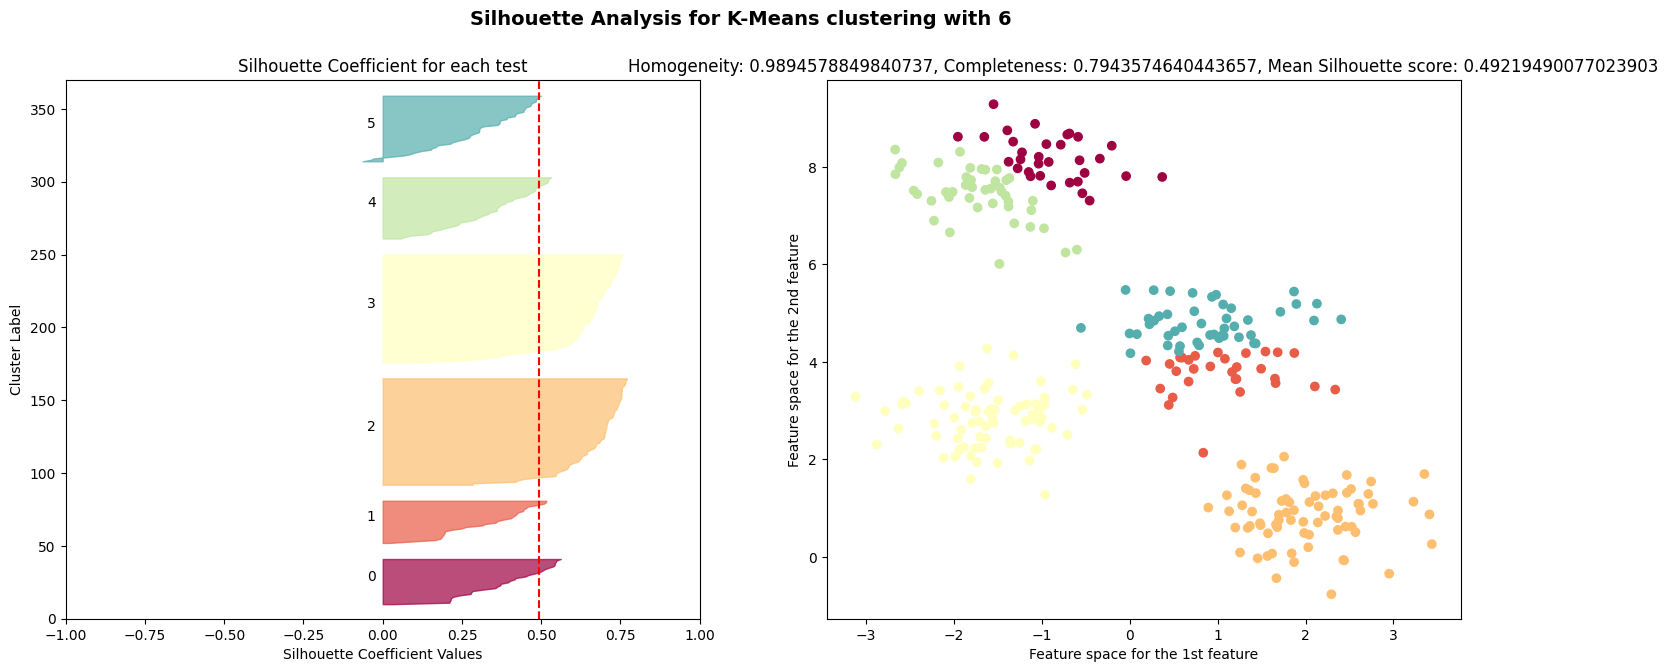

In [12]:
range_n_clusters = [x for x in range(2,7)]

for n_clusters in range_n_clusters:
    # Training K_means
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)

    # Calculating the Homogeneity and Completeness
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Calculating Silhouette Coefficient for each example
    silhouette = metrics.silhouette_samples(X, y_pred)

    # Calculating the mean of Silhouette Coefficient
    silhouette_mean = np.mean(silhouette)

    # --------- Plots -----------

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    plt.suptitle(f'Silhouette Analysis for K-Means clustering with {n_clusters}', fontsize=14, fontweight='bold')
    ax1.set_title('Silhouette Coefficient for each test')
    ax1.set_xlabel('Silhouette Coefficient Values')
    ax1.set_ylabel('Cluster Label')
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, silhouette_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    y_lower = 10
    for i in range(n_clusters):
        ith_s = silhouette[y_pred==i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_mean, color="red", linestyle="--")
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors)

Visually and numerically can be demostrated that using 4 clusters is the best idea, because the **Homogeneity**, **Completeness** and **Silhouette Score** better than the other clusters. but, KMean is not perfect.

Some of the problems of Silhouette Score are the **Outliers** and is limited to the **linear limits** of the cluster, this means that if the data has complex geometry, then the model won't be precise. It can be solved using **Spectal Clustering**

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)


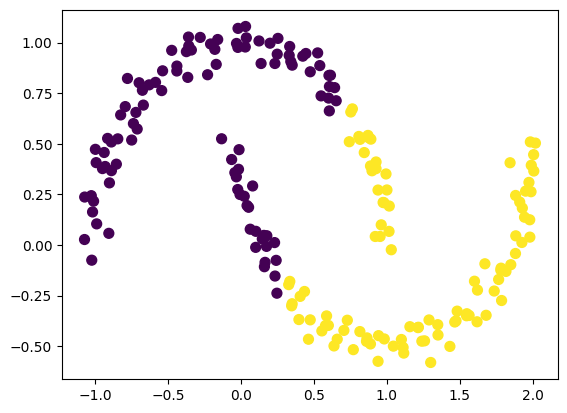

In [15]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

It's clear that KMeans cannot separate correctly the 2 groups due the complex geometry of the data, but if we use **Spectral Clustering** it can be solved.

c:\Users\cerbu\anaconda3\envs\DataScience\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


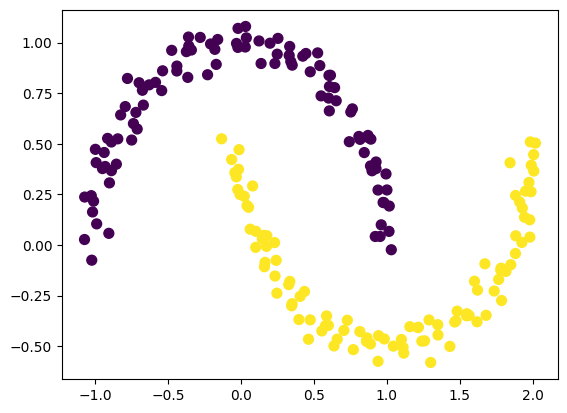

In [16]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## **DBSCAN Algorithm**

The Density-Based Spatial Clustering of Applications with Noise (DBSCAN) search the areas where has more concentrated points and those concentrated points conforms a cluster. The points that are **not** part of a cluster are labeled as noise.

The concept of DBSCAN is the core points that are samples in high density areas. Next to them can be find the border points without being part of core points. So,  a cluster is an aggroupation of core points and border points (located at the maximum distance of some core points).

### Parameters
- Eps: Max distance between 2 samples to be considered part of a neighborhood.
- MinPts: Number of samples of a neighborhood for a point to be considered core point.

### Considerations

- Eps-neighborhood (ε-neighborhood): The ε-neighborhood of a point `q` is the set of all points that are within a distance less than or equal to ε from `q`. In other words, if a point `p` is inside the circle of radius ε around `q`, then `p` belongs to its neighborhood.

- Outlier (noise point): A point is considered an outlier if it does not belong to any cluster. This happens when the point is not in a dense region and is not connected to any cluster.

- Core Point: A point is a core point when, within its ε-neighborhood, it has at least a minimum number of points defined by `MinPts`. This means the point lies in a high-density region.

- Border Point: A point is a border point when:  
  - It lies inside a cluster.  
  - But its ε-neighborhood is not dense enough to be a core point.  
  - However, it is close to at least one core point that connects it to the cluster.

- Directly density-reachable: A point `p` is directly density-reachable from a point `q` with respect to `ε` and `MinPts` if:  
  - `p` is within the ε-neighborhood of `q`.  
  - `q` is a core point.  
  - `p` does not need to be a core point to be reachable.

  Interpretation: A core point can “extend” its cluster to any point within its immediate neighborhood.

- Density-reachable: A point `p` is density-reachable from `q` if:  
  - There exists a chain of points connecting `q` to `p`.  
  - Each point in the chain lies within the ε-neighborhood of the previous one.  
  - At least one point in the chain is a core point.

  Interpretation: A cluster can grow by connecting multiple dense regions that are linked together.

### The DBSCAN Algorithm

1. Select randomnly a `p` point
2. Identify every reachable point from `p` respect ``Eps`` and ``MinPts``
3. if `p` is a core point, a cluster is created
4. if `p` is a border point, none other point is density reachable from ``p``, continue with the next point
5. Repeat the process until every point is processed.

Visualize the DBSCAN Cluster:
    https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set_theme()
import numpy as np
import warnings
import pandas as pd

import IPython.display as display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

warnings.filterwarnings('ignore')
%matplotlib inline

Using DBSCAN on Blobs

Number of Clusters: 3
Homogeneity: 0.9820397966048764
Completeness: 0.9378109619395728
Mean Silhouette score: 0.6798548805414468


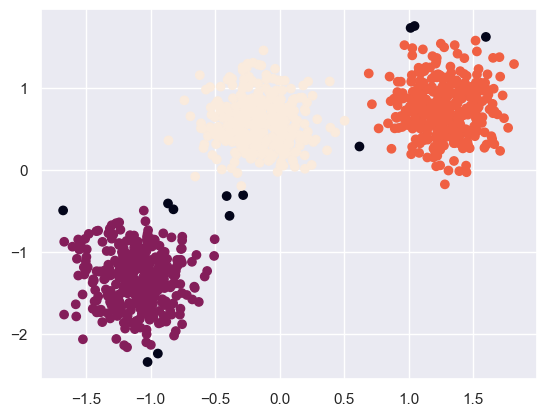

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=170)

# Normalize
X = StandardScaler().fit_transform(X)

#Traing DBSCAN
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)

print('Number of Clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))
plt.show()

The black points are the outliers, also, DBSCAN not always works well

### Problem with DBSCAN

Number of clusters: 3
Homogeneity: 0.5779851468789232
Completeness: 0.9879288809412908
Silhouette Score: 0.5790844573923847


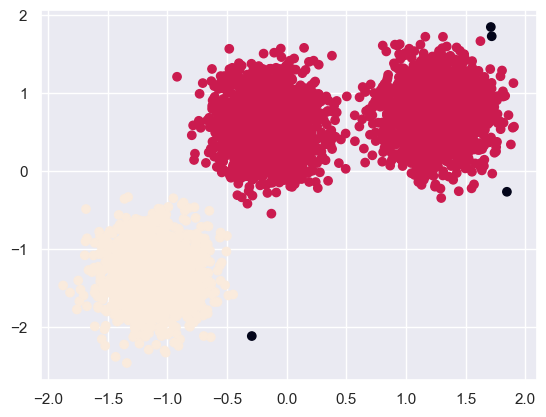

In [3]:
X, y = make_blobs(n_samples=5000, n_features=2, centers= 3, random_state=170)
X = StandardScaler().fit_transform(X)

y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print(f"Number of clusters: {len(set(y_pred[np.where(y != -1)]))}")
print(f'Homogeneity: {metrics.homogeneity_score(y, y_pred)}')
print(f'Completeness: {metrics.completeness_score(y, y_pred)}')
print(f'Silhouette Score: {metrics.silhouette_score(X, y_pred)}')
plt.show()

So, we need to adjust ``eps`` and `min_samples`

Number of clusters: 4
Homogeneity: 0.9874537653721496
Completeness: 0.9571483027120634
Silhouette Score: 0.6825508919764781


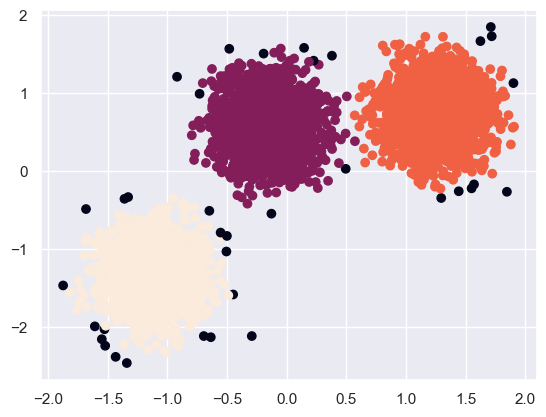

In [4]:
y_pred = DBSCAN(eps=0.13, min_samples=5).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print(f"Number of clusters: {len(set(y_pred[np.where(y != -1)]))}")
print(f'Homogeneity: {metrics.homogeneity_score(y, y_pred)}')
print(f'Completeness: {metrics.completeness_score(y, y_pred)}')
print(f'Silhouette Score: {metrics.silhouette_score(X, y_pred)}')
plt.show()

A side effect is to have more outliers.

Another example:

-------------- DBSCAN --------------
Number of clusters 2
Homogeneity: 0.9931221594414225
Completeness: 0.9324476192842364
Silhouette: 0.18959894494591747


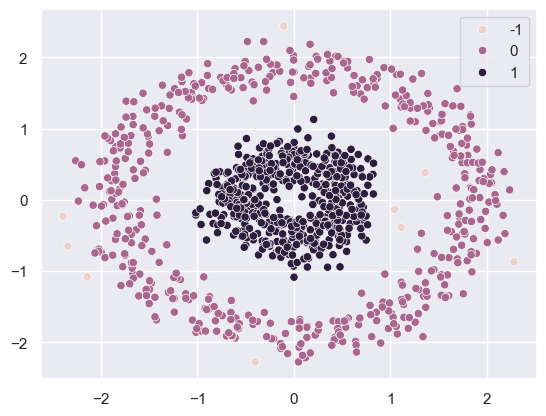

-------------- K-Mean --------------
Number of clusters 2
Homogeneity: 2.8863271782139172e-06
Completeness: 2.8870019549259677e-06
Silhouette: 0.29611354887380703


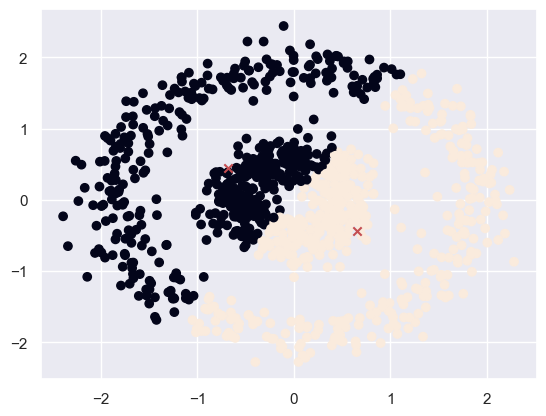

-------------- Spectral Cluster --------------
Number of clusters 2
Homogeneity: 1.0
Completeness: 1.0
Silhouette: 0.19133190233214717


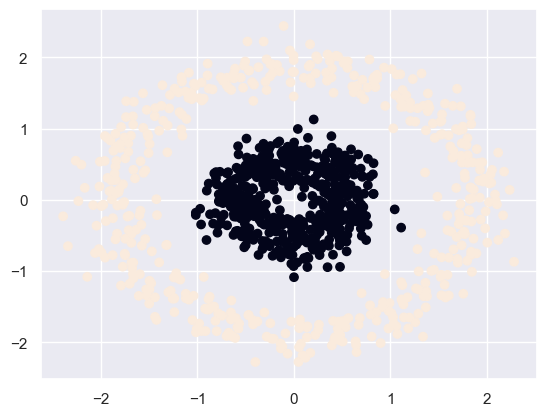

In [5]:
print("-------------- DBSCAN --------------")

X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

X = StandardScaler().fit_transform(X)

y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred)
print(f'Number of clusters {len(set(y_pred[np.where(y_pred != -1)]))}')
print(f'Homogeneity: {metrics.homogeneity_score(y, y_pred)}')
print(f'Completeness: {metrics.completeness_score(y, y_pred)}')
print(f'Silhouette: {metrics.silhouette_score(X, y_pred)}')
plt.show()


print("-------------- K-Mean --------------")
kmean = KMeans(n_clusters=2,
               n_init=3,
               init='k-means++',
               tol=1e-4,
               random_state=170,
               verbose=False,).fit(X)
y_pred = kmean.predict(X)
plt.Figure(figsize=(16,8))
plt.scatter(X[:,0], X[:,1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='r', marker='x')
print(f'Number of clusters 2')
print(f'Homogeneity: {metrics.homogeneity_score(y, y_pred)}')
print(f'Completeness: {metrics.completeness_score(y, y_pred)}')
print(f'Silhouette: {metrics.silhouette_score(X, y_pred)}')
plt.show()

print("-------------- Spectral Cluster --------------")
spectralcluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
y_pred = spectralcluster.fit_predict(X)
print(f'Number of clusters 2')
print(f'Homogeneity: {metrics.homogeneity_score(y, y_pred)}')
print(f'Completeness: {metrics.completeness_score(y, y_pred)}')
print(f'Silhouette: {metrics.silhouette_score(X, y_pred)}')
plt.scatter(X[:,0], X[:,1], c=spectralcluster.labels_)
plt.show()


### Tuning the eps parameter

To adjust the eps parameter, the KNN (K Nearest Neighbor) can be used to find the best value. Calculating the KNN

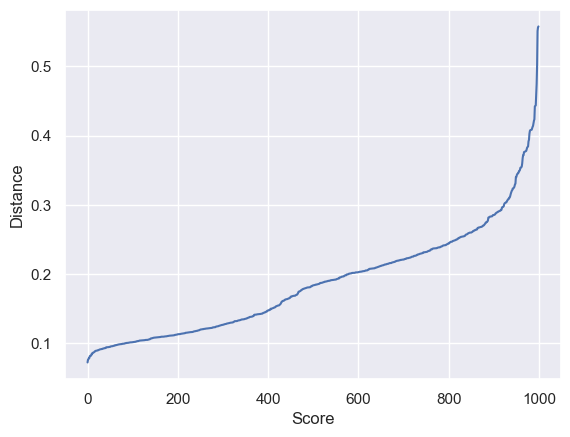

In [6]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, index = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
plt.plot(distances)
plt.xlabel("Score")
plt.ylabel("Distance")
plt.show()

We are looking for the Elbow in the graph, visually can tell that the best eps is between 0.1 and 0.3. To select the perfect value, the `kneed` library has the function KneeLocator to get the best value.

0.26432047365137945


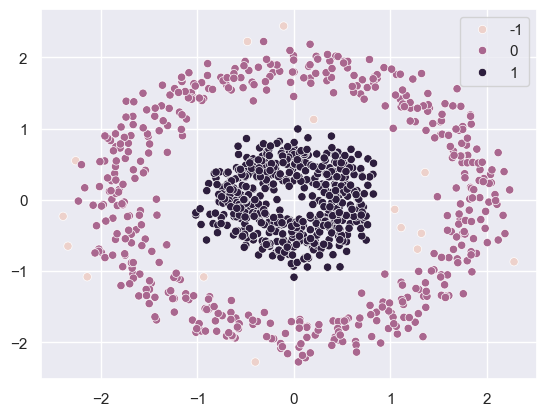

<Figure size 500x500 with 0 Axes>

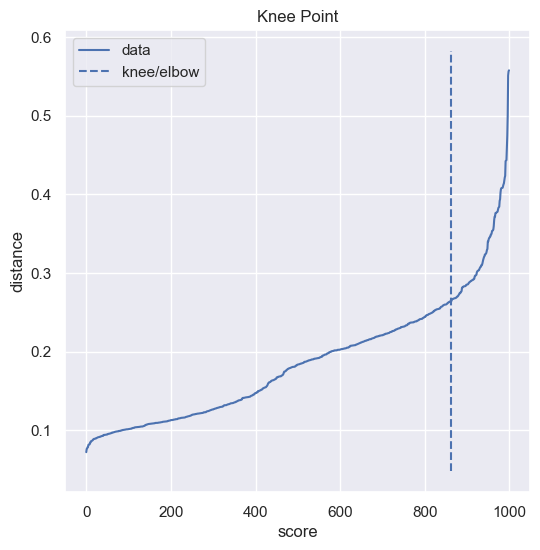

Number of clusters 2
Homogeneity: 0.9891710785766896
Completeness: 0.9014579652263636
Silhouette: 0.1874911279080556


In [16]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve="convex", direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("score")
plt.ylabel("distance")

print(distances[knee.knee])
plt.show()

#Using the eps value
y_pred = DBSCAN(eps=0.261879, min_samples=10).fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred)
print(f'Number of clusters {len(set(y_pred[np.where(y_pred != -1)]))}')
print(f'Homogeneity: {metrics.homogeneity_score(y, y_pred)}')
print(f'Completeness: {metrics.completeness_score(y, y_pred)}')
print(f'Silhouette: {metrics.silhouette_score(X, y_pred)}')

## Hierarchical Clustering

It's a type of clustering partitioner that doesn't need the number of clusters like K-Means. There is 2 strategies of hierarchical clustering:

- **Agglomerative** (bottom-up): The aggrouping starts with all observations separated, each as an individual cluster. Then the clusters combines until converge to 1 cluster.
- **Divisive** (Top-down): Is opposite to Agglomerative. Start with all observation in the same cluster, divisions ocurr until each observation is an individual cluster.

### Hierarchical Agglomerative Algorithm
1. Consider each of the n observations as an individual cluster. forming the base of a dendrogram.
2. Iterative process until all observations belongs to an unique cluster.
    - Calculate the distance of each possible pair n of clusters. The Analist has to determine the type of measure to quantify the similarities between observations or groups (Distance and linkage)
    - Two or more similar clusters combine, so the clusters now are n-1.
3. Cut the tree generator (dendrogram) to a determinated height to create the final clusters.
#### **Most used types of linkage**
The process to quantify the similarities between 2 clusters is denominated as `linkage`. The most used type of linkage are:
* Complete or Maximum: Calculates the distance between every possible pair for an observation of Cluster A and Cluster B. The biggest is selected as the distance between the 2 clusters `(maximal intercluster dissimilarity)`.
* Single or Minimum: Calculates the distance between every possible pair for an observation of Cluster A and Cluster B. The smallest is selected as the distance between the 2 clusters `(minimal intercluster dissimilarity)`.
* Average: Calculates the distance between every possible pair for an observation of Cluster A and Cluster B. The mean distance is selected as the distance between the 2 clusters `(mean intercluster dissimilarity)`.
* Centroid: A centroid is calculated for every cluster and the distance between centroids is the distance between clusters.
* Ward: Is a general method. The selection of the pair of clusters that were merged at each step of the agglomerative hierarchical clustering process is based on the optimal value of an objective function, which can be any function defined by the analyst. Ward's minimum variance method is a particular case in wich the objective is to minimize the total within-cluster variance. At each step, the two clusters whose merger result in the smallest increase in the total within-cluster variance are identified. This is the same metric minimized in K-Means

The preferred methods are `Complete`, `Mean` and `Ward's minimum` beacuse those generate more compensated dendrograms. They are not better than others, it always is going to depend on the Study Case

### Hierarchical Divisive Algorithm

The most known algorithm is DIANA (DIvisive ANAlysis clustering). This algorithm starts with one cluster that has every observations. After, there are divisions until each observation it's a cluster. On each iteration, the cluster with the biggest diameter is selected, and in the cluster is identified the most disparate observation that is the one with the biggest mean distance from the other observations of the cluster. This observation starts a new cluster and the observations are going to be reasigned if they are most close to the new cluster or the rest of the partition.

1. All the n observations are in the same cluster
2. Repeat until there are n clusters:
    * For each cluster calculate the biggest distance between the observation pairs (Diameter of the cluster)
    * Select the cluster with the biggest diameter
    * Calculate the mean distance of each observation to the others
    * The most far distance start a new cluster
    * The observations are reasigned to the new cluster or the old depending on wich is the closest.

In the divisive algorithm is nothing like ``Linkage`` only has to be determined the distance

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating a dendrogram

def plot_dendrogram(model, **kwargs):
    '''
    Extract the information from an AgglomerativeClustering model
    and represents it's dendrogram with the dendrogram function of scipy.cluster.hierarchy
    '''
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)


    #plot
    dendrogram(linkage_matrix, **kwargs)

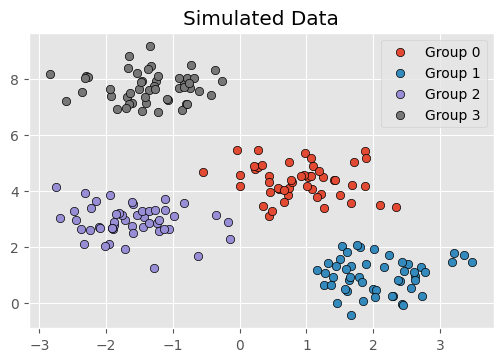

In [ ]:
# Generating data

X, y = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std=0.60, shuffle=True, random_state=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
for i in np.unique(y):
    ax.scatter(x = X[y == i, 0],
               y = X[y == i, 1],
               c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
               marker= 'o',
               edgecolors= 'black',
               label = f"Group {i}"
               )
ax.set_title('Simulated Data')
ax.legend()

In [5]:
X_scaled = scale(X)

In [10]:
# Complete Model
hclust_model_complete = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage= 'complete',
                            distance_threshold=0,
                            n_clusters= None
                        )
hclust_model_complete.fit(X_scaled)

# Mean Model
hclust_model_mean = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage= 'average',
                            distance_threshold=0,
                            n_clusters= None
                        )
hclust_model_mean.fit(X_scaled)

# Ward Model
hclust_model_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage= 'ward',
                            distance_threshold=0,
                            n_clusters= None
                        )
hclust_model_ward.fit(X_scaled)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,0
,compute_distances,False


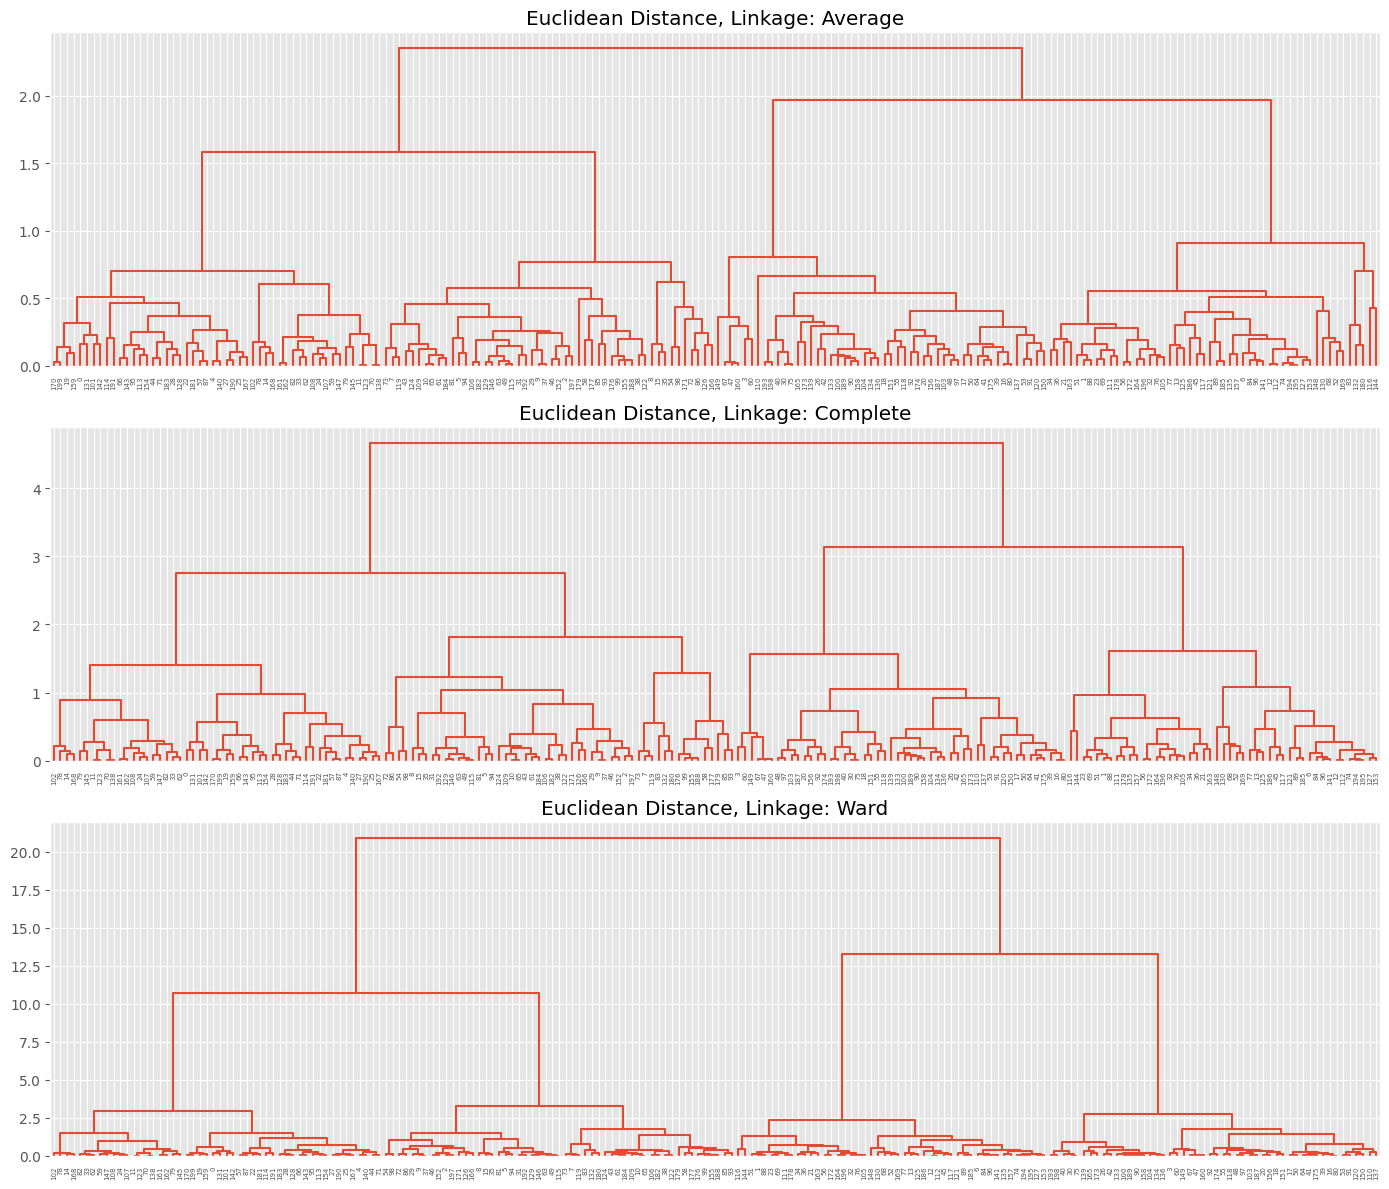

In [12]:
# Creating Dendrograms
fig, axs = plt.subplots(3, 1, figsize=(14,12))
plot_dendrogram(hclust_model_mean, color_threshold=0, ax=axs[0])
axs[0].set_title("Euclidean Distance, Linkage: Average")
plot_dendrogram(hclust_model_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Euclidean Distance, Linkage: Complete")
plot_dendrogram(hclust_model_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Euclidean Distance, Linkage: Ward")
plt.tight_layout()

To select the optimal number of cluster in hierarchical models, the Silhouette index is the best tool.

Text(0, 0.5, 'Silhouette Score')

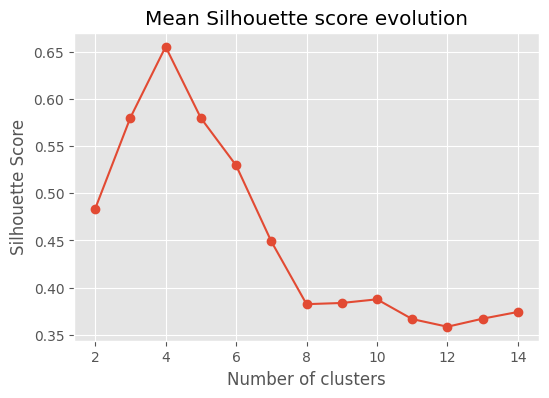

In [19]:
range_n_clusters = range(2,15)
mean_values_silhouette = []

for n_clusters in range_n_clusters:
    model = AgglomerativeClustering(
        metric='euclidean',
        linkage='ward',
        n_clusters= n_clusters
    )

    cluster_labels = model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    mean_values_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
ax.plot(range_n_clusters, mean_values_silhouette, marker='o')
ax.set_title("Mean Silhouette score evolution")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette Score")

With this, the optimal number of clusters is `4`